<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/multi_ticker_deep_sarsa_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0 --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requireme

In [1]:

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib


  Using cached gym_anytrading-2.0.0-py3-none-any.whl.metadata (292 bytes)
  Using cached stable_baselines3-2.6.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64

In [2]:
# ✅ Clean install of TensorFlow compatible with Colab's GPU (CUDA 11.8 + cuDNN 8.x)
!pip install tensorflow==2.12.0

# ⚠️ Restart runtime after this!
!pip install numpy==1.24.4 --force-reinstall

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
treesc

In [1]:
import torch
import cudf
import cuml
import dask
import pandas as pd
import numpy as np
import scipy
import lightgbm as lgb
import gymnasium as gym
import stable_baselines3

#=========================
#Version Checks
#=========================
print(" Library Versions")
print("--------------------")
print(" PyTorch:", torch.__version__)
print(" CUDA:", torch.version.cuda)
print(" cuDF:", cudf.__version__)
print(" cuML:", cuml.__version__)
print(" Dask:", dask.__version__)
print(" Pandas:", pd.__version__)
print(" NumPy:", np.__version__)
print(" SciPy:", scipy.__version__)
print(" LightGBM:", lgb.__version__)
print(" Gymnasium:", gym.__version__)
print(" Stable Baselines3:", stable_baselines3.__version__)

#=========================
# GPU Check (Torch + NVIDIA)
#=========================
print("\n GPU Availability")
print("--------------------")
print(" PyTorch GPU Available:", torch.cuda.is_available())
print(" GPU Count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print(" GPU Name:", torch.cuda.get_device_name(0))

 Library Versions
--------------------
 PyTorch: 2.6.0+cu124
 CUDA: 12.4
 cuDF: 24.12.00
 cuML: 24.12.00
 Dask: 2024.11.2
 Pandas: 2.2.3
 NumPy: 1.24.4
 SciPy: 1.15.2
 LightGBM: 4.5.0
 Gymnasium: 1.1.1
 Stable Baselines3: 2.6.0

 GPU Availability
--------------------
 PyTorch GPU Available: True
 GPU Count: 1
 GPU Name: Tesla T4


In [ ]:
# ✅ Clean install of TensorFlow compatible with Colab's GPU (CUDA 11.8 + cuDNN 8.x)
!pip uninstall -y tensorflow keras
!pip install tensorflow==2.12.0

# ⚠️ Restart runtime after this!
!pip install numpy==1.24.4 --force-reinstall

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Successfully uninstalled keras-2.12.0
  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (586.0 MB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 104.1 MB/s eta 0:00:00
^C


In [3]:
# ✅ Core & System Utilities
import os
import gc
import sys
import time
import json
import pickle
import random
from datetime import datetime
from collections import defaultdict, deque

# ✅ Data Science Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numba

# ✅ Financial Data
import yfinance as yf

# ✅ Machine Learning & Preprocessing
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix
)

# ✅ Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import Input, backend as K
from tensorflow.keras import mixed_precision

# ✅ Visualization & Display
import IPython.display as display

# ✅ RAPIDS Libraries (for GPU-accelerated ML, optional)
import cupy as cp

# ✅ Reinforcement Learning (Stable Baselines3)
import stable_baselines3
from stable_baselines3 import A2C, DDPG, DQN, PPO, SAC, TD3
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

# ✅ Gym & Trading Environments
import gym
import gymnasium as gym
import gym_anytrading
from gym.spaces import Box
from gymnasium.spaces import Box as GymBox, Discrete
from gymnasium.wrappers import TimeLimit

# ✅ CUDA (Optional Paths - for manual GPU configuration)
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

# ✅ GPU Check (Colab only)
!nvidia-smi


Tue Apr 15 00:04:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Required for TensorFlow compatibility (GPU + cuDNN)
!pip uninstall -y tensorflow keras -q
!pip install tensorflow==2.12.0 -q

# Fix protobuf compatibility
!pip install protobuf==3.20.3 -q

# Essential packages
!pip install numpy==1.24.4 pandas joblib yfinance scikit-learn matplotlib -q


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.12.0 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you ha

In [ ]:
import os
from google.colab import drive

if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')
else:
    print("✅ Google Drive is already mounted.")



✅ Google Drive is already mounted.


In [ ]:
# ✅ Downgrade NumPy to a compatible version
!pip install numpy==1.24.4 --force-reinstall

# ✅ Reinstall LightGBM after fixing NumPy
!pip install lightgbm --force-reinstall --no-cache-dir


In [ ]:
!pip install -U scikit-learn==1.3.2 --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 45.7 MB/s eta 0:00:00


In [7]:
!pip install yfinance

In [9]:
# ✅ Imports
import os, gc, random
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from datetime import datetime

# ✅ Config
TICKERS = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT'
]
SEQUENCE_LENGTH = 60
SAVE_DIR = "/content/drive/MyDrive/DeepSARSA_Models"
os.makedirs(SAVE_DIR, exist_ok=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Feature Engineering
def compute_technical_indicators(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))
    df['MACD'] = df['Close'].ewm(span=12, adjust=False).mean() - df['Close'].ewm(span=26, adjust=False).mean()
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['ATR'] = df['High'].rolling(window=14).max() - df['Low'].rolling(window=14).min()
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()
    df.dropna(inplace=True)
    return df

# ✅ Deep SARSA Model
class DQNNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNNet, self).__init__()
        self.lstm = nn.LSTM(input_dim, 64, batch_first=True)
        self.fc1 = nn.Linear(64, 32)
        self.out = nn.Linear(32, output_dim)

    def forward(self, x):
        h, _ = self.lstm(x)
        h = h[:, -1, :]  # last hidden state
        x = torch.relu(self.fc1(h))
        return self.out(x)

class DeepSARSAAgent:
    def __init__(self, input_dim, action_dim, lr=1e-3, gamma=0.99):
        self.gamma = gamma
        self.model = DQNNet(input_dim, action_dim).to(device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.criterion = nn.MSELoss()

    def select_action(self, state, epsilon):
        if random.random() < epsilon:
            return random.randint(0, 2)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()

    def update(self, state, action, reward, next_state, next_action, done):
        q_values = self.model(state)
        next_q_values = self.model(next_state)
        target = reward + self.gamma * next_q_values[0, next_action] * (1 - int(done))
        loss = self.criterion(q_values[0, action], target.detach())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

# ✅ Training Loop
def train_agent_on_stock(ticker, episodes=10):
    print(f"\n🔁 Training Deep SARSA on {ticker}")
    df = yf.download(ticker, period="720d", interval="1h", progress=False)
    if df.empty:
        print(f"⚠️ No data for {ticker}, skipping.")
        return

    df = compute_technical_indicators(df)
    features = ['Close', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'Signal_Line', 'ATR', 'OBV']
    df = df[features].copy()

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df)

    # Create sequences
    X = []
    for i in range(SEQUENCE_LENGTH, len(scaled)):
        X.append(scaled[i-SEQUENCE_LENGTH:i])
    X = np.array(X)

    state_dim = X.shape[2]
    agent = DeepSARSAAgent(state_dim, 3)

    for ep in range(episodes):
        state_idx = random.randint(0, len(X) - 2)
        state = torch.tensor(X[state_idx][None], dtype=torch.float32).to(device)
        action = agent.select_action(state, epsilon=1.0 - ep/episodes)
        total_reward = 0

        for t in range(state_idx, len(X) - 1):
            next_state = torch.tensor(X[t+1][None], dtype=torch.float32).to(device)
            # ✅ FIXED: Use last timestep and first feature (assumed 'Close')
            reward = float(X[t+1, -1, 0] - X[t, -1, 0])
            done = t + 2 == len(X)
            next_action = agent.select_action(next_state, epsilon=1.0 - ep/episodes)
            agent.update(state, action, reward, next_state, next_action, done)
            total_reward += reward
            if done:
                break
            state, action = next_state, next_action

        print(f"✅ Episode {ep+1}: Total Reward = {total_reward:.4f}")

    # Save model
    model_path = f"{SAVE_DIR}/deep_sarsa_{ticker}.pth"
    torch.save(agent.model.state_dict(), model_path)
    print(f"✅ Saved model to {model_path}")

# ✅ Train on All Tickers
for ticker in TICKERS:
    train_agent_on_stock(ticker, episodes=5)
    gc.collect()



🔁 Training Deep SARSA on AAPL
✅ Episode 1: Total Reward = -0.1263
✅ Episode 2: Total Reward = -0.1191
✅ Episode 3: Total Reward = -0.1599
✅ Episode 4: Total Reward = 0.2376
✅ Episode 5: Total Reward = 0.0261
✅ Saved model to /content/drive/MyDrive/DeepSARSA_Models/deep_sarsa_AAPL.pth

🔁 Training Deep SARSA on TSLA
✅ Episode 1: Total Reward = 0.3223
✅ Episode 2: Total Reward = 0.0267
✅ Episode 3: Total Reward = 0.1948
✅ Episode 4: Total Reward = -0.0753
✅ Episode 5: Total Reward = 0.1644
✅ Saved model to /content/drive/MyDrive/DeepSARSA_Models/deep_sarsa_TSLA.pth

🔁 Training Deep SARSA on MSFT
✅ Episode 1: Total Reward = -0.0461
✅ Episode 2: Total Reward = -0.0878
✅ Episode 3: Total Reward = 0.5344
✅ Episode 4: Total Reward = 0.5285
✅ Episode 5: Total Reward = 0.5883
✅ Saved model to /content/drive/MyDrive/DeepSARSA_Models/deep_sarsa_MSFT.pth

🔁 Training Deep SARSA on GOOGL
✅ Episode 1: Total Reward = 0.3477
✅ Episode 2: Total Reward = 0.0819
✅ Episode 3: Total Reward = 0.5532
✅ Episod

📈 Top 5 Stocks by Simulated Portfolio Value:


,Symbol,Avg Reward,Portfolio Value
7,BRK-B,0.59438,159438.0
11,V,0.55980,155980.0
19,KO,0.52596,152596.0
24,COST,0.47812,147812.0
29,WMT,0.46390,146390.0



📉 Bottom 5 Stocks by Simulated Portfolio Value:


,Symbol,Avg Reward,Portfolio Value
17,MRK,-0.56110,43890.0
26,TMO,-0.47284,52716.0
18,PEP,-0.39336,60664.0
23,PFE,-0.31946,68054.0
9,JNJ,-0.20122,79878.0


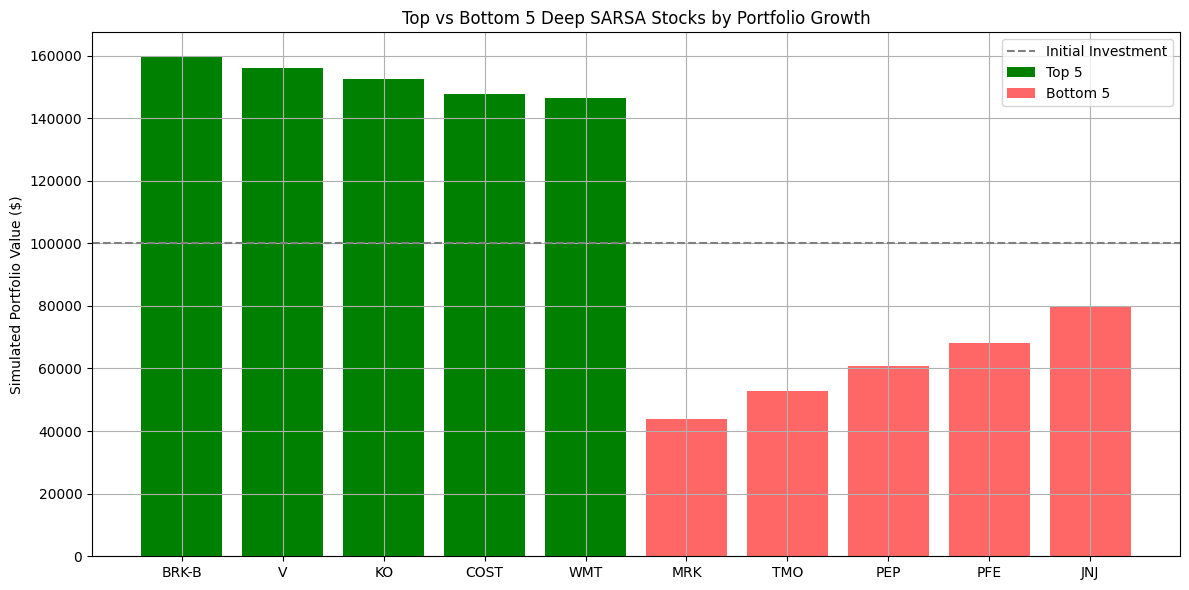

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ✅ Deep SARSA reward logs
sarsa_rewards = {
    'AAPL': [ -0.1263, -0.1191, -0.1599,  0.2376,  0.0261],
    'TSLA': [ 0.3223,  0.0267,  0.1948, -0.0753,  0.1644],
    'MSFT': [-0.0461, -0.0878,  0.5344,  0.5285,  0.5883],
    'GOOGL': [0.3477, 0.0819, 0.5532, 0.4746, 0.0232],
    'AMZN': [0.5745, 0.5198, 0.2640, 0.4016, -0.1633],
    'NVDA': [-0.2083, -0.0584, 0.4436, 0.2250, 0.5887],
    'META': [0.0059, 0.6231, 0.3605, -0.0940, 0.5961],
    'BRK-B': [0.4629, 0.9151, 0.6745, 0.4866, 0.4328],
    'JPM': [-0.2362, 0.0623, 0.5084, 0.5324, 0.6010],
    'JNJ': [-0.3765, -0.1186, -0.1533, -0.2059, -0.1518],
    'XOM': [0.0906, -0.1659, -0.0493, -0.3690, -0.1208],
    'V': [0.3305, 0.5646, 0.5410, 0.6772, 0.6857],
    'PG': [-0.0697, 0.0639, 0.4182, 0.0297, 0.2243],
    'UNH': [0.3035, 0.5551, 0.3567, 0.3939, 0.3258],
    'MA': [0.3269, 0.5134, 0.5353, -0.1766, 0.2311],
    'HD': [-0.3042, -0.2166, 0.2410, -0.2705, 0.2683],
    'LLY': [-0.0517, 0.5904, -0.0189, -0.0366, -0.2129],
    'MRK': [-0.2441, -0.8472, -0.4353, -0.8665, -0.4124],
    'PEP': [-0.6422, -0.4715, -0.3617, 0.0598, -0.5512],
    'KO': [0.5623, 0.5759, 0.4723, 0.4275, 0.5918],
    'BAC': [-0.4364, 0.3624, -0.2248, 0.1499, -0.3266],
    'ABBV': [0.1968, 0.4852, 0.5295, 0.4328, 0.3209],
    'AVGO': [0.0754, 0.4483, 0.4481, 0.4551, 0.6498],
    'PFE': [-0.7475, -0.1994, -0.2339, -0.1888, -0.2277],
    'COST': [0.1976, -0.0752, 0.7930, 0.6618, 0.8134],
    'CSCO': [0.0533, 0.4336, 0.4111, 0.3664, -0.2620],
    'TMO': [-0.6935, -0.5820, -0.0989, -0.3738, -0.6160],
    'ABT': [0.2865, 0.3367, 0.3434, 0.5229, 0.4215],
    'ACN': [-0.0870, -0.1368, 0.0031, 0.1516, -0.1459],
    'WMT': [0.3045, 0.6786, 0.7158, -0.1032, 0.7238],
}

# ✅ Simulate portfolio value using average reward per stock
initial_cash = 100_000
summary = []

for symbol, rewards in sarsa_rewards.items():
    avg_return = np.mean(rewards)
    final_value = initial_cash * (1 + avg_return)
    summary.append({"Symbol": symbol, "Avg Reward": avg_return, "Portfolio Value": final_value})

# ✅ Create DataFrame
df = pd.DataFrame(summary)

# ✅ Top and Bottom 5 by Portfolio Value
top5 = df.sort_values(by="Portfolio Value", ascending=False).head(5)
bottom5 = df.sort_values(by="Portfolio Value", ascending=True).head(5)

# ✅ Display
print("📈 Top 5 Stocks by Simulated Portfolio Value:")
display(top5)

print("\n📉 Bottom 5 Stocks by Simulated Portfolio Value:")
display(bottom5)

# ✅ Plotting
plt.figure(figsize=(12, 6))
plt.bar(top5['Symbol'], top5['Portfolio Value'], label='Top 5', color='green')
plt.bar(bottom5['Symbol'], bottom5['Portfolio Value'], label='Bottom 5', color='red', alpha=0.6)
plt.axhline(initial_cash, color='gray', linestyle='--', label='Initial Investment')
plt.ylabel("Simulated Portfolio Value ($)")
plt.title("Top vs Bottom 5 Deep SARSA Stocks by Portfolio Growth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
